# Simple RNN (many to many)
- 사인파형 시계열을 입력으로 받아 다음 스텝의 출력을 예측
- 세 개의 순서열을 입력한 후 출력값이 target과 일치하게 만듦

## 1.데이터 준비 - Sin(x)
- 시계열 데이터로 sin(x) 사용
    - 2 * pi = 360º

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
s = np.sin(np.arange(21) * np.pi/4)
s

array([ 0.00000000e+00,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        1.22464680e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        3.67394040e-16, -7.07106781e-01, -1.00000000e+00, -7.07106781e-01,
       -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,  7.07106781e-01,
        6.12323400e-16])

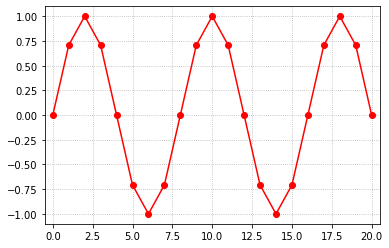

In [3]:
plt.plot(s, 'ro-')
plt.xlim(-0.5, 20.5)
plt.grid(linestyle = ':')
plt.show()

## 2.X_train, y_train 데이터 생성
- y_train 값은 len(s) - 3임

In [4]:
X_train = []
y_train = np.empty(len(s)-3)
for i in range(len(s) - 3):
    X_train.append(s[i:i+3])
    y_train[i] = s[i + 3]
y_train

array([ 7.07106781e-01,  1.22464680e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -2.44929360e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  3.67394040e-16, -7.07106781e-01, -1.00000000e+00,
       -7.07106781e-01, -4.89858720e-16,  7.07106781e-01,  1.00000000e+00,
        7.07106781e-01,  6.12323400e-16])

In [5]:
np.array(X_train).shape

(18, 3)

- 입력 데이터 개수, timesteps, input_dim
    - 노드 하나에 세 개의 데이터가 들어옴
    - shape 변경이 필요하다!
    - 회귀의 문제가 아님!!☆
    - 순서대로 들어오기 때문!!★

In [6]:
X_train = np.array(X_train).reshape(-1, 3, 1)
X_train.shape

(18, 3, 1)

In [7]:
X_train[0], y_train[0]

(array([[0.        ],
        [0.70710678],
        [1.        ]]), 0.7071067811865476)

## 3.순환 신경망 모델 정의 및 설정

In [8]:
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

- 출력이 하나일 때 입력을 10이라고 넣으면 
- 노드가 10개이고, 각각의 노드 하나가 RNN임
    - 하나의 노드에는 timestemp가 세 개 있음
- 유닛 개수가 많을 수록 처리가 좋음

In [10]:
model = Sequential([
    SimpleRNN(10, input_shape = X_train.shape[1:], activation = 'tanh'),   #  X_train[1:] = (3, 1)
    Dense(1, activation = 'linear') # 여기서는 Flatten이 필요 없음
])
model.summary()
# input dim = 1
# 그 안에 타임스템프가 3개 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10)                120       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile('adam', loss = 'mse')

### 3.1.모델학습전

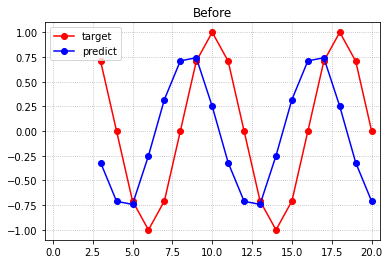

In [12]:
plt.plot(np.arange(3, 21), y_train, 'ro-', label = 'target')
plt.plot(np.arange(3, 21), model.predict(X_train), 'bo-', label = 'predict')
plt.xlim(-0.5, 20.5), plt.grid(linestyle = ':')
plt.title('Before')
plt.legend()
plt.show()

### 3.2.모델학습후

In [13]:
hist = model.fit(X_train, y_train, epochs = 100, verbose = 0)

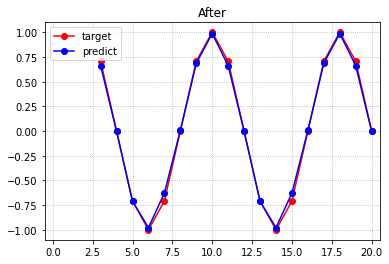

In [14]:
plt.plot(np.arange(3, 21), y_train, 'ro-', label = 'target')
plt.plot(np.arange(3, 21), model.predict(X_train), 'bo-', label = 'predict')
plt.xlim(-0.5, 20.5), plt.grid(linestyle = ':')
plt.title('After')
plt.legend()
plt.show()